# FINAL PROJECT: COVID-19 PNEUMONIA DETECTION

## Image Processing

### Setting paths and creating sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import csv
import seaborn as sns
import matplotlib.image as mpimg
from skimage.color import rgb2gray

First step is to **load the images separating them into each class**. Besides in order to posteriorly preprocess the data, **size** of each image is going to be studied and saved also.

In [2]:
# Creation of lists in which images belonging to each class are going to be introduced.
train_normal = []
train_pneumonia = []
test_normal = []
test_pneumonia = []

# List with all the different path containing the images for each list created before.
paths = [r"C:xray_dataset_covid19/train/NORMAL",r"C:xray_dataset_covid19/train/PNEUMONIA",
         r"C:xray_dataset_covid19/test/NORMAL",r"C:xray_dataset_covid19/test/PNEUMONIA"]

# Creation of a list that is going to include size of each image.
size = []

# Thanks to this for loop, images are going to be saved in its corresponding class. 
# Besides, a list containing the size of images is going to be created for the posterior preprocess of images.
for folder in paths:
    for filename in os.listdir(folder):
        img = (cv2.imread(os.path.join(folder,filename),0))
        size.append(img.shape)
        if folder == r"C:xray_dataset_covid19/train/NORMAL":
            train_normal.append(img)
        if folder == r"C:xray_dataset_covid19/train/PNEUMONIA":
            train_pneumonia.append(img)
        if folder == r"C:xray_dataset_covid19/test/NORMAL":
            test_normal.append(img)
        if folder == r"C:xray_dataset_covid19/test/PNEUMONIA":
            test_pneumonia.append(img)

Both of classes (normal and pneumonia) belonging to train are going to be added in order to **create and unique train set**. This train set is going to constitute the X parameter for our model. The Y parameters is going to be composed by the labels of each picture. Our **dataset does not contain labels itself**, it has created **two different folders in which it makes a distinction between disease or not**. As dataset includes a diagnostic measure (similar to labels), it can be assumed that model constructed is going to follow a **supervised learning**.


In order to train and test properly the model, it is **need to create a set with numerical labels** intead of two different folders. 

In [3]:
train = train_normal + train_pneumonia # Creation of a unique train set with both, normal and pneumonia images.
train_labels = np.zeros((len(train),1)) # Here, we are going to introduce the label of each corresponding image.

for i in range(len(train)):
        if train[i] in train_normal:
            train_labels[i] = '0' #Images that belong to the train_normal list are going to be labelled with 0 (no-disease).
        else:
            train_labels[i] = '1' #Images that belong to the train_pneumonia list are going to be labelled with 1 (disease).

C:\Users\verac\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


Same process done in training set is going to be performed in test set.

In [4]:
test = test_normal + test_pneumonia # Creation of a unique test set with both, normal and pneumonia images.
test_labels = np.zeros((len(test),1)) # Here, we are going to introduce the label of each corresponding image.

for i in range(len(test)):
        if test[i] in test_normal:
            test_labels[i]="0" #Images that belong to the test_normal list are going to be labelled with 0 (no-disease).
        else:
            test_labels[i]= "1" #Images that belong to the test_pneumonia list are going to be labelled with 1 (disease).

C:\Users\verac\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


Now, **visualization of 8 random images with their corresponding label** is going to be performed:

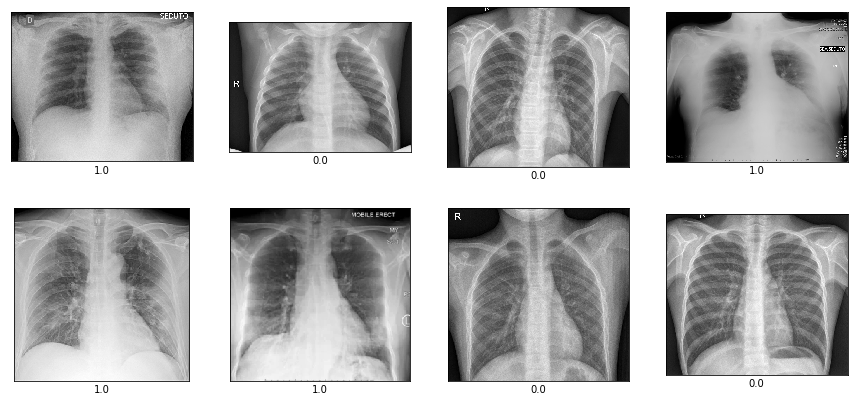

In [5]:
plt.figure(figsize=(15,7))
random_inds = np.random.choice(len(train),8)

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train[image_ind]), cmap="gray")
    plt.xlabel(train_labels[image_ind][0])

### Preprocessing

Visualizing size list it can be seen how **images of our dataset have different size**. This is a problem that need to be **solved creating a standard size** for all the images.

In [6]:
size # To visualize that images have different sizes.

[(1317, 1857),
 (1509, 2111),
 (1837, 2031),
 (1326, 1663),
 (1818, 2053),
 (1443, 1852),
 (1478, 1873),
 (1916, 2144),
 (1945, 2214),
 (1785, 1863),
 (2155, 2444),
 (1238, 1803),
 (2057, 2498),
 (1559, 1984),
 (1432, 1917),
 (1893, 2624),
 (617, 1300),
 (1384, 2022),
 (2458, 2720),
 (1827, 2271),
 (2139, 2343),
 (1314, 1647),
 (1632, 1949),
 (1953, 2170),
 (1836, 2024),
 (1534, 1658),
 (2329, 2480),
 (1709, 2096),
 (1504, 1741),
 (1793, 2153),
 (2071, 2022),
 (2032, 2297),
 (2382, 2746),
 (1725, 2001),
 (1060, 1762),
 (1882, 2752),
 (1041, 1616),
 (1318, 1754),
 (1761, 2034),
 (1226, 1974),
 (1392, 2034),
 (1558, 2060),
 (650, 1322),
 (1068, 1786),
 (1246, 1740),
 (1230, 1774),
 (767, 1260),
 (925, 1240),
 (1187, 1754),
 (1014, 1558),
 (1461, 2006),
 (1357, 1890),
 (2076, 2426),
 (1036, 1754),
 (1282, 1788),
 (1311, 1866),
 (925, 1558),
 (1326, 1862),
 (906, 1460),
 (863, 1472),
 (2085, 1970),
 (1299, 2022),
 (1125, 1824),
 (871, 1542),
 (1303, 1910),
 (1907, 2165),
 (1440, 1784),
 (1

Let's **visualize the height and width** of all the images (train+test) using seaborn. Doing this we are going to analyse **how different in size the images are**.

In [7]:
# In these lists, width and height of all the images (train+test) is going to be saved.

width = []
height = []
for i in size:
    width.append(i[0])
    height.append(i[1])

In [8]:
# Lists have to be converted into a dataframe in order to plot them.

df = pd.DataFrame({'Width': width,'Height': height, 'Index': range(0, len(train+test))})

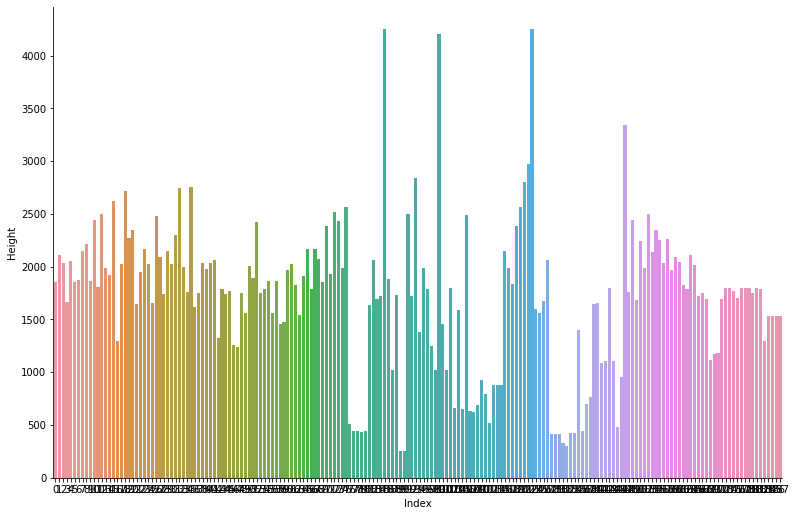

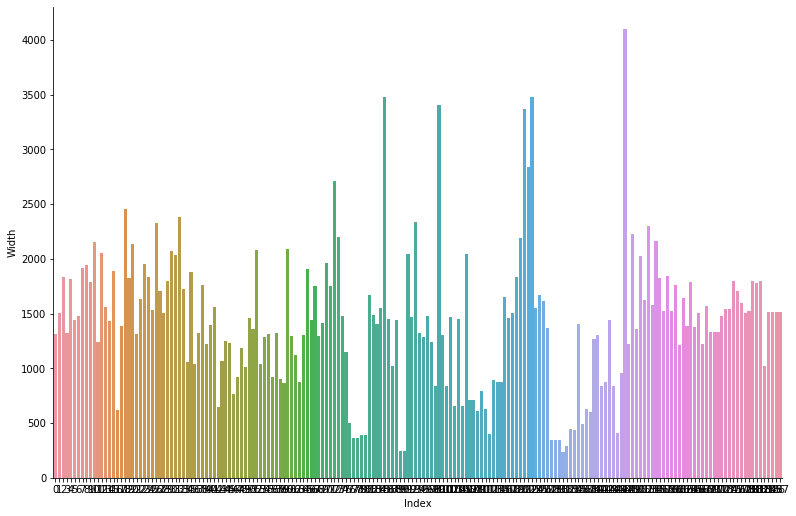

In [9]:
def shape(x, y, df):
  
    a = sns.catplot(kind = 'bar', x = x, y = y, data = df,height=7.27, aspect=12.7/8.27)
    return a


shape('Index', 'Height', df)
shape('Index', 'Width', df)

In the previous images, **x-axis** called 'Index' **represents all of the images** (train and test images) while **y-axis** represent the **height and width of each image**. Besides, there is a big variety of widths and heights. Therefore, what we are going to do is to transform our images into the **smallest/minimun size** in the data set as although we might loose some information, it rounds the average and **the algorithm will work faster and will be more effective**.

However, exact visualization of minimum point cannot be done because of the huge amount of data we have. In order to perform a better analysis, **describe table is displayed**.

In [10]:
df.describe(include='all')

,Width,Height,Index
count,188.000000,188.000000,188.000000
mean,1430.377660,1725.228723,93.500000
std,633.787943,698.754955,54.415071
min,237.000000,255.000000,0.000000
25%,1039.750000,1443.750000,46.750000
50%,1445.000000,1796.000000,93.500000
75%,1767.750000,2059.250000,140.250000
max,4095.000000,4248.000000,187.000000


In order to convert size of **all images to an equal size**, we decide to choose the minimum height and width, that as we can seen is: **height=255, width=237**.

On the other hand, we also need to **normalize the intensity of our images** since the pixels have values from 0 to 255, then we have to make a transformation of each pixel: "value / 255" and we will always have a value between 0 and 1 (black and white).

Thus, to achieve what we have just explained, we will create a function that will help us to normalize the images (X set) we are going to use or that will be used in the future.

However, we are aware it exists the function ImageDataGenerator that preprocess the images as we want in a more compact way, but we realised about this after creating the functions so we decided to leave and use them as they also work in a good way.

In [11]:
def norm(images_set,sizes_set):
    
    min_size = np.min(sizes_set, axis=0)  # We select minimum size
    ntraintest = np.zeros((len(images_set),min_size[0],min_size[1])) # Here, we are going to introduce the new size into each image.

    for i in range(len(images_set)):

        img1 = cv2.resize(images_set[i], (min_size[1],min_size[0])) #size normalization
        traintest_image = img1/255.0 #intensity normalization

        ntraintest[i] = traintest_image # Update of size in each image.
    
    ntraintest = ntraintest.reshape(len(images_set),min_size[0],min_size[1], 1) 
        
    return ntraintest

In [12]:
ntrain = norm(train,size)
ntrain.shape

(148, 237, 255, 1)

In [13]:
ntest = norm(test, size)
ntest.shape

(40, 237, 255, 1)

Let's **visualize** again **8 random images with their corresponding labels** in order **to check** that **normalization** has been performed correctly.

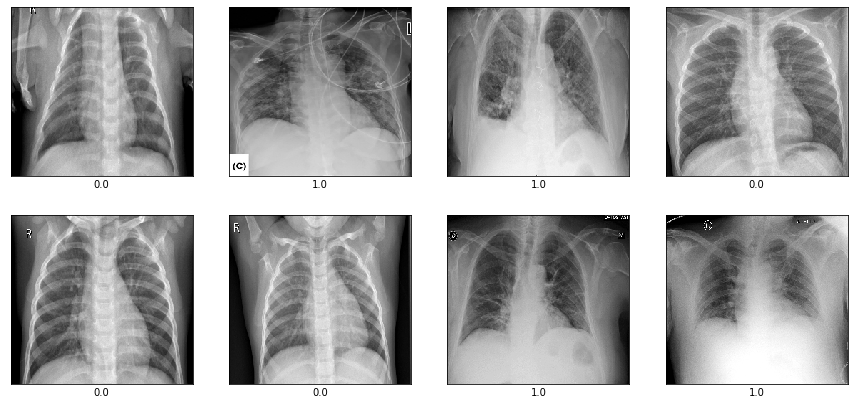

In [14]:
plt.figure(figsize=(15,7))
random_inds = np.random.choice(len(ntrain),8)

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(ntrain[image_ind]), cmap="gray")
    plt.xlabel(train_labels[image_ind][0])

### CNN Model

As we have seen, deep learning is a very useful tool for classifying images, the most common and simplest method to use in Deep Learning is to train an Artifical Neural Network (ANN). However, it can take a lot of time to train it so, this is the reason we finally chose to do it with Convolutional Neural Networks (CNN).

The CNN approach is based on a local understanding of the image. It genetares the enough weights to scan a small area of the image. But this will better explained when analysing the different layers.

The main challenge of CNNs is to create the model with the appropiate hyperparameters that will work for our images and our goal.

In [15]:
t1_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(60, (3,3), activation = 'relu', input_shape = (237, 255, 1)),
    tf.keras.layers.MaxPool2D((2,2)), 
    tf.keras.layers.Dropout(0.20), 
    
    
    tf.keras.layers.Conv2D(110, (3,3), activation = 'relu'), 
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.20), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
  
    
    tf.keras.layers.Dense(1, activation = 'sigmoid') 
])


In [16]:
t1_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 235, 253, 60)      600       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 117, 126, 60)      0         
_________________________________________________________________
dropout (Dropout)            (None, 117, 126, 60)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 115, 124, 110)     59510     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 62, 110)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 57, 62, 110)       0         
_________________________________________________________________
flatten (Flatten)            (None, 388740)            0

Let’s go through this model:


- The first layer is a Convolutional layer that uses 60 filters (3×3) with an input_shape=[237, 255, 1], because of the images size and because there is a single color channel (i.e., grayscale).


- Next, we have a max pooling layer which uses a pool size of 2, so it divides each spatial dimension by a factor of 2.


- We also add a dropout layer, with a dropout rate of 20% to reduce overfitting.


- Then we repeat the convolutional layer but in this case with 110 filters.


- We repeat also the same max pooling layer and the same dropout layer.


- Finally, there it is the fully connected network, composed of a hidden dense layer and a dense output layer with a sigmoid function, as it is used for binary classifications. Note that we must flatten its inputs, since a dense network expects a 1D array of features for each instance. 

Then, we will use an adam optimizer as it is the one that has given us better results. On the other hand, binary cross entropy will be established as we have a binary classification. This way of compiling will be repeated along the other trials.

In [17]:
t1_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Finally, we train the model.

In [18]:
#These two variables will be used as callbacks. This way we will be able to get a view on internal states and 
#statistics of the model during training, sharing previous information and avoiding overfitting.

checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_final_project.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [19]:
history = t1_model.fit(ntrain, train_labels, epochs=10, validation_data = (ntest,test_labels),
                    callbacks=[checkpoint_cb,early_stopping_cb])
t1_model = tf.keras.models.load_model("keras_final_project.h5")

Train on 148 samples, validate on 40 samples
Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
148/148 [==============================] - 24s 162ms/sample - loss: 8.5622 - accuracy: 0.5405 - val_loss: 0.5110 - val_accuracy: 0.6750
Epoch 2/10
148/148 [==============================] - 19s 128ms/sample - loss: 0.6802 - accuracy: 0.5608 - val_loss: 0.6719 - val_accuracy: 0.8000
Epoch 3/10
148/148 [==============================] - 22s 147ms/sample - loss: 0.5947 - accuracy: 0.8176 - val_loss: 0.5068 - val_accuracy: 0.9750
Epoch 4/10
148/148 [==============================] - 22s 148ms/sample - loss: 0.4750 - accuracy: 0.7838 - val_loss: 0.3236 - val_accuracy: 0.9750
Epoch 5/10
148/148 [==============================] - 22s 147ms/sample - loss: 0.3545 - accuracy: 0.8649 - val_loss: 0.1967 - val_accuracy: 0.9750
Epoch 6/10
148/148 [==============================] - 21s 143ms/sample - loss: 0.2778 - accuracy: 0.8851 - val_loss: 0.1295 - 

In [20]:
t1_model.evaluate(ntest,test_labels) #Now, we evaluate the model with the test set.

40/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.04444122463464737, 1.0]

As we can see, this is **very suitable for our purpose** because we obtain a very **low loss and a perfect accuracy (1.0)**. However, **accuracy can vary in each experiment in a range between (0.97-1)**.

In order to visualize this model we are going to **plot accuracy and loss value with respect to the different number of epoch**.

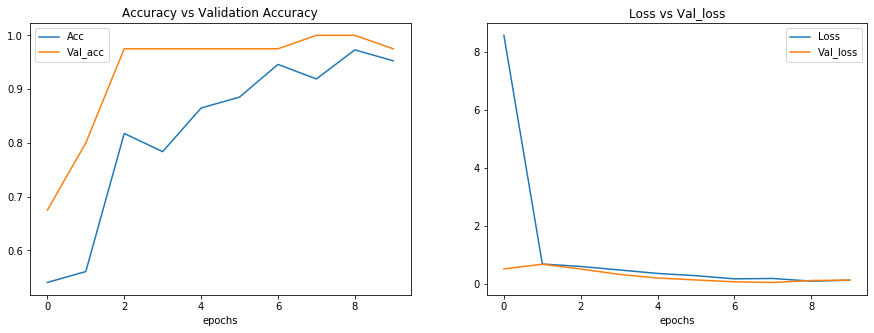

In [21]:
acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(len(history.epoch))

title1 = 'Accuracy vs Validation Accuracy'
leg1 = ['Acc', 'Val_acc']
title2 = 'Loss vs Val_loss'
leg2 = ['Loss', 'Val_loss']

def plot(epochs, acc, val_acc, leg, title):
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title(title)
    plt.legend(leg)
    plt.xlabel('epochs')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plot(epochs, acc, val_acc, leg1, title1)
plt.subplot(1,2,2)
plot(epochs, loss, val_loss, leg2, title2)
plt.show()

Regarding the graph we can see how **accuracy** (for train and validation) gets **really high with a few epochs**. **However**, this value starts to **stabilise with 8 or more epochs**. For this reason, we are going to use 10 epochs.

In terms of **loss value** we see how **it reaches a very low value with 2 epochs**. However **close to 10 epochs the loss value is even smaller** and **difference between loss value in train and validation is minimal**.

### Predictions using our model

- **Predictions of our database**

In [22]:
# With model created we predict the test set of our database.

predicted_classes = t1_model.predict_classes(ntest)

# Comparing the prediced results with the real ones we are going to create two lists in which images index will be
#introduced depending if they have been well-predicted or not.
correct_indices = []
incorrect_indices = []

for i in range(len(predicted_classes)):
    if predicted_classes[i] == int(test_labels[i]):
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

In [23]:
print(correct_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [24]:
print(incorrect_indices)

[]


As it can be seen thanks to the previous lists **all the used images have been well-predicted with our model**.

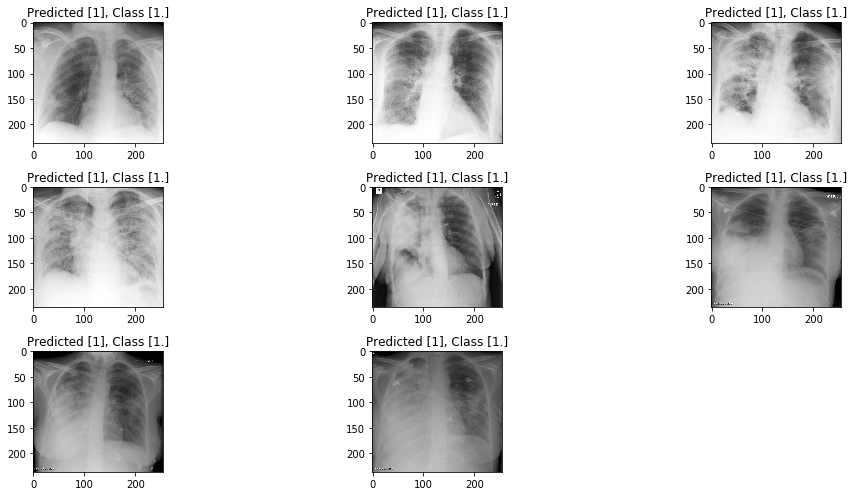

In [25]:
plt.figure(figsize=(15,7))
for i, correct in enumerate(correct_indices[31:39]):
    plt.subplot(3,3,i+1)
    plt.imshow(ntest[correct].reshape(237, 255), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    
plt.tight_layout()

In [26]:
plt.figure(figsize=(15,7))

for i, incorrect in enumerate(incorrect_indices):
    plt.subplot(3,3,i+1)
    plt.imshow(ntest[incorrect].reshape(237, 255), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    
plt.tight_layout()

<Figure size 1080x504 with 0 Axes>

- **Prediction of an external image**

Previous predictions have been done using the images of our database; however, we want to check the performance of our model with images coming from an external source. The image used is an image with pneumonia, let's see if our model can predict it.

(1024, 1024)


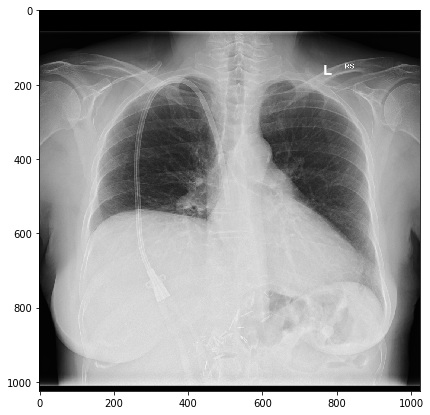

In [27]:
# We load the image
plt.figure(figsize=(15,7))


image = mpimg.imread('externalimage.jpeg')
image = rgb2gray(image)
plt.imshow(image, cmap ="gray")
print(image.shape)

In [28]:
# We normalize the image
image_list = [image]
nimage = norm(image_list,size)

In [29]:
# We predict if image corresponds to pneumonia or not
predicted_classes = t1_model.predict_classes(nimage)

In [30]:
predicted_classes

array([[1]])